In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_excel('./fit_parameter10.xlsx')
dfo = pd.read_excel('./EdgeContour1.xls')

In [43]:
df.describe()

,note,a/x1,b/x0,phi/y1,xc/y0,yc/length,Y0_in,long_axis,short_axis,angle,start_seq,end_seq,start_x,start_y,end_x,end_y
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,0.235294,10.467190,300.378566,0.099386,650.119415,7006.636007,294.024252,26.641528,15.673488,10.911765,1548.117647,1662.382353,650.895435,465.805474,650.940429,465.793879
std,0.986540,15.518328,1062.412768,0.566091,912.237907,22613.048939,293.060420,35.166738,26.377471,11.495368,1060.025007,1097.027113,568.917513,234.400961,568.857207,234.416443
min,-1.000000,-1.000011,-1092.155513,-0.999922,-420.827088,-616.724396,0.000000,0.000000,0.000000,0.000000,1.000000,134.000000,18.984760,155.840600,18.984760,155.840900
25%,-1.000000,0.017022,9.216311,-0.019948,0.942817,254.083773,0.000000,0.000000,0.000000,0.000000,513.250000,749.500000,105.593975,265.638925,105.593975,265.638925
50%,1.000000,1.469419,15.965287,0.115092,454.957070,636.512766,261.591171,19.846505,1.230939,7.500000,1563.000000,2101.000000,711.001550,331.001250,711.501500,331.001250
75%,1.000000,16.032543,103.716436,0.434609,1003.673391,1241.005507,645.466856,32.065086,17.429810,20.750000,2608.250000,2695.500000,1182.607750,668.354600,1182.607750,668.354600
max,1.000000,52.380990,4158.857144,0.999879,3127.657750,94846.161661,802.629798,157.125481,98.357016,33.000000,2988.000000,3886.000000,1267.913000,803.047400,1267.913000,803.047400


In [44]:
for i in range(df.shape[0]):
    if(df.iloc[i,0]==1):
        x1=np.array([df.iloc[i,12]-df.iloc[i,4],df.iloc[i,13]-df.iloc[i,5]])
        y1=np.array([df.iloc[i,14]-df.iloc[i,4],df.iloc[i,15]-df.iloc[i,5]])
        
        # 分别计算两个向量的模：
        l_x=np.sqrt(x1.dot(x1))
        l_y=np.sqrt(y1.dot(y1))
        
        # 计算两个向量的点积
        dian=x1.dot(y1)
        
        
        # 计算夹角的cos值：
        cos_=dian/(l_x*l_y)
        # print('向量的模=',l_x,l_y)
        # print("x  y",x1,y1)
        # print('向量的点积=',dian)
        # print('夹角的cos值=',cos_)
        # 求得夹角（弧度制）：
        angle_hu=np.arccos(cos_)
        # 转换为角度值：
        angle_d=angle_hu*180/np.pi
        df.iloc[i,9]=angle_d

In [45]:
X=dfo.iloc[:,0]
Y=dfo.iloc[:,1]

<function matplotlib.pyplot.show(close=None, block=None)>

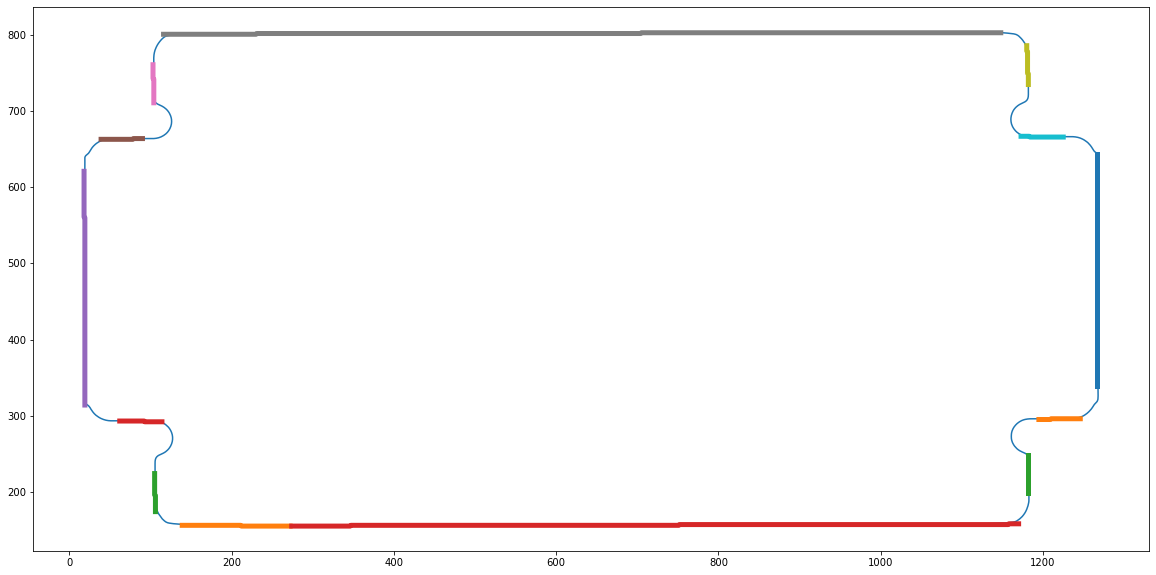

In [46]:
#parameter MAX
seq = np.arange(5000)
plt.figure(figsize = (20,10))
# for i in range(MAX+100):
#     seq[i] = i 

plt.plot(X,Y)

for i in range(df.shape[0]):
    # if(df.iloc[i,0]==1):
        
        #draw ellipse
    if(df.iloc[i,0]==-1):
        #draw line
        # print("0")
        s = df.iloc[i,10]
        e = df.iloc[i,11]
        x1 = df.iloc[i,1]
        x0 = df.iloc[i,2]
        y1 = df.iloc[i,3]
        y0 = df.iloc[i,4]
        ax = seq[s:e]
        x_list = np.arange(e-s)
        y_list = np.arange(e-s)
        for j in range(e-s):
            # x_list[j] = x_list[j]+s
            # y_list[j] = y_list[j]+s
            beta =x1* ax[j]  +x0
            x_list[j] = beta
            y_list[j] = y1* ax[j]  +y0
        
        plt.plot(x_list,y_list,linewidth = 5)






plt.show


        
    

In [47]:
result= pd.DataFrame(df)

writer = pd.ExcelWriter('result1.xlsx')		# 写入Excel文件
result.to_excel(writer, float_format='%.5f')		# ‘page_1’是写入excel的sheet名
writer.save()

writer.close()

D:\softwares\lib\site-packages\xlsxwriter\workbook.py:336: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")
